In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Processing

In [5]:
cat_val = []
num_val  = []

for column in df.columns:
    if df[column].nunique() <= 10:
      cat_val.append(column)
    else:
        num_val.append(column)

In [6]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [7]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding Categorical Data 

In [8]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
cat_val.remove('sex')

In [10]:
data =pd.get_dummies(df,columns = cat_val,drop_first=True)

In [11]:
data

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,1,125,212,168,1.0,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,53,1,140,203,155,3.1,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,70,1,145,174,125,2.6,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,61,1,148,203,161,0.0,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,62,0,138,294,106,1.9,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1021,60,1,125,258,141,2.8,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
1022,47,1,110,275,118,1.0,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
1023,50,0,110,254,159,0.0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True


# Feature Scaling

In [12]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,1,125,212,168,1.0,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,53,1,140,203,155,3.1,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,70,1,145,174,125,2.6,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,61,1,148,203,161,0.0,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,62,0,138,294,106,1.9,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
le = StandardScaler()

In [15]:
df[num_val] = le.fit_transform(df[num_val])

In [16]:
df[num_val]

,age,trestbps,chol,thalach,oldpeak
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888
1,-0.158157,0.479107,-0.833861,0.255968,1.727137
2,1.716595,0.764688,-1.396233,-1.048692,1.301417
3,0.724079,0.936037,-0.833861,0.516900,-0.912329
4,0.834359,0.364875,0.930822,-1.874977,0.705408
...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329


In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


# Splitling the Dataset into traning set and test set

In [18]:
X = df.drop('target',axis = 1)

In [19]:
y = df['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Logistic Regression

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)

In [26]:
print('Accuracy of Logistic Regression Algo is ',accuracy_score(y_test,y_pred1))

Accuracy of Logistic Regression Algo is  0.7951219512195122


# SVC

In [27]:
from sklearn import svm

In [28]:
svm = svm.SVC()

In [29]:
svm.fit(X_train,y_train)

SVC()

In [30]:
y_pred2 = svm.predict(X_test)

In [31]:
print('Accuracy of SVC algo is ',accuracy_score(y_test,y_pred2))

Accuracy of SVC algo is  0.8341463414634146


# KNeighbors Classifiers

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred3 = knn.predict(X_test)
print('Accuracy of KNeighborsClassifier algo is ',accuracy_score(y_test,y_pred3))

Accuracy of KNeighborsClassifier algo is  0.8048780487804879


# DecisionTree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred4 = dt_clf.predict(X_test)

In [38]:
print('Accuracy of decision tree algo. is',accuracy_score(y_test,y_pred4)*100)

Accuracy of decision tree algo. is 98.53658536585365


# Random Forest Classfier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred5 = rf_clf.predict(X_test)

print('Accuracy of random forest algo. is',accuracy_score(y_test,y_pred5))

Accuracy of random forest algo. is 0.9853658536585366


In [41]:
acc_score = pd.DataFrame({'Models':['LR','SVC','KNC','DTC','RFC'],'ACC' : [
    accuracy_score(y_test,y_pred1),
    accuracy_score(y_test,y_pred2),
    accuracy_score(y_test,y_pred3),
    accuracy_score(y_test,y_pred4),
    accuracy_score(y_test,y_pred5),
]})

In [42]:
acc_score

,Models,ACC
0,LR,0.795122
1,SVC,0.834146
2,KNC,0.804878
3,DTC,0.985366
4,RFC,0.985366


In [43]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

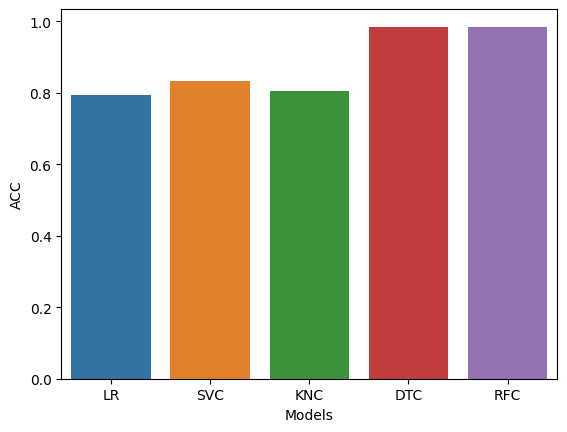

In [44]:
sns.barplot(data = df,x = acc_score['Models'],y = acc_score['ACC'])

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X,y)

RandomForestClassifier()

# Prediction on new data

In [46]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':225,
    'chol':600,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index = [0])

In [47]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,225,600,0,1,168,0,1.0,2,2,3


In [48]:
p = rf_clf.predict(new_data)
if p[0] == 0:
    print("No Disease")
else:
    print("Heart Disease")

No Disease


# Save Model using JobLib

In [49]:
import joblib

In [50]:
joblib.dump(rf_clf,'model_joblib_heart')

['model_joblib_heart']

In [51]:
model = joblib.load('model_joblib_heart')

In [52]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [53]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
import tkinter as tk
import joblib

# Load the pre-trained model
model = joblib.load('model_joblib_heart')

# Function to flash a color on a widget
def flash_widget(widget, color, duration=200):
    original_bg = widget.cget("bg")
    widget.config(bg=color)
    widget.after(duration, lambda: widget.config(bg=original_bg))

# Create a function to predict heart disease
def predict_heart_disease():
    try:
        # Get the input values
        age = float(entry_widgets['age'].get())
        sex = float(entry_widgets['sex'].get())
        cp = float(entry_widgets['cp'].get())
        trestbps = float(entry_widgets['trestbps'].get())
        chol = float(entry_widgets['chol'].get())
        fbs = float(entry_widgets['fbs'].get())
        restecg = float(entry_widgets['restecg'].get())
        thalach = float(entry_widgets['thalach'].get())
        exang = float(entry_widgets['exang'].get())
        oldpeak = float(entry_widgets['oldpeak'].get())
        slope = float(entry_widgets['slope'].get())
        ca = float(entry_widgets['ca'].get())
        thal = float(entry_widgets['thal'].get())

        # Create a numpy array with the input data
        input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

        # Make a prediction using the loaded model
        prediction = model.predict(input_data)

        # Display the prediction with animation
        if prediction[0] == 0:
            prediction_label.config(text="No Disease", fg="green")
            flash_widget(prediction_label, "green")
        else:
            prediction_label.config(text="Heart Disease", fg="red")
            flash_widget(prediction_label, "red")
    except ValueError:
        prediction_label.config(text="Invalid input", fg="black")
        flash_widget(prediction_label, "black")

# Create the main window
root = tk.Tk()
root.title("Heart Disease Prediction")


# Create labels and entry widgets for each column
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

entry_widgets = {}  # Dictionary to store entry widgets

for i, col in enumerate(columns):
    label = tk.Label(root, text=col.capitalize() + ":")
    label.grid(row=i, column=0, padx=10, pady=5)
    entry = tk.Entry(root, bg="lightblue")  # Color the entry fields
    entry.grid(row=i, column=1, padx=10, pady=5)
    entry_widgets[col] = entry  # Store the entry widget in the dictionary

# Create a Predict button with animation
predict_button = tk.Button(root, text="Predict", command=predict_heart_disease, bg="orange", fg="white")
predict_button.grid(row=len(columns), columnspan=2, pady=10)
flash_widget(predict_button, "orange", 1000)

# Create a label to display the prediction result with animation
prediction_label = tk.Label(root, text="", fg="black", font=("Helvetica", 16))
prediction_label.grid(row=len(columns) + 1, columnspan=2, pady=10)

# Run the GUI main loop
root.mainloop()


C:\Users\VAIBHAV SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
67,0,0,106,223,0,1,142,0,0.3,2,2,2,1